# OnlineNewPopularity (data from UCI)

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

## Download data

[Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)

In [ ]:
import pyensae
pyensae.download_data("OnlineNewsPopularity.zip", url="https://archive.ics.uci.edu/ml/machine-learning-databases/00332/")

['OnlineNewsPopularity/OnlineNewsPopularity.names',
 'OnlineNewsPopularity/OnlineNewsPopularity.csv']

In [ ]:
import pandas
data = pandas.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
data.columns = [c.strip() for c in data.columns]  # remove spaces around data
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
data.shape

(39644, 61)

In [ ]:
import numpy
numeric = [c for i,c in enumerate(data.columns) if data.dtypes[i] in [numpy.float64, numpy.int64]]
len(numeric)

60

## Corr-Pair-Plots and scales

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


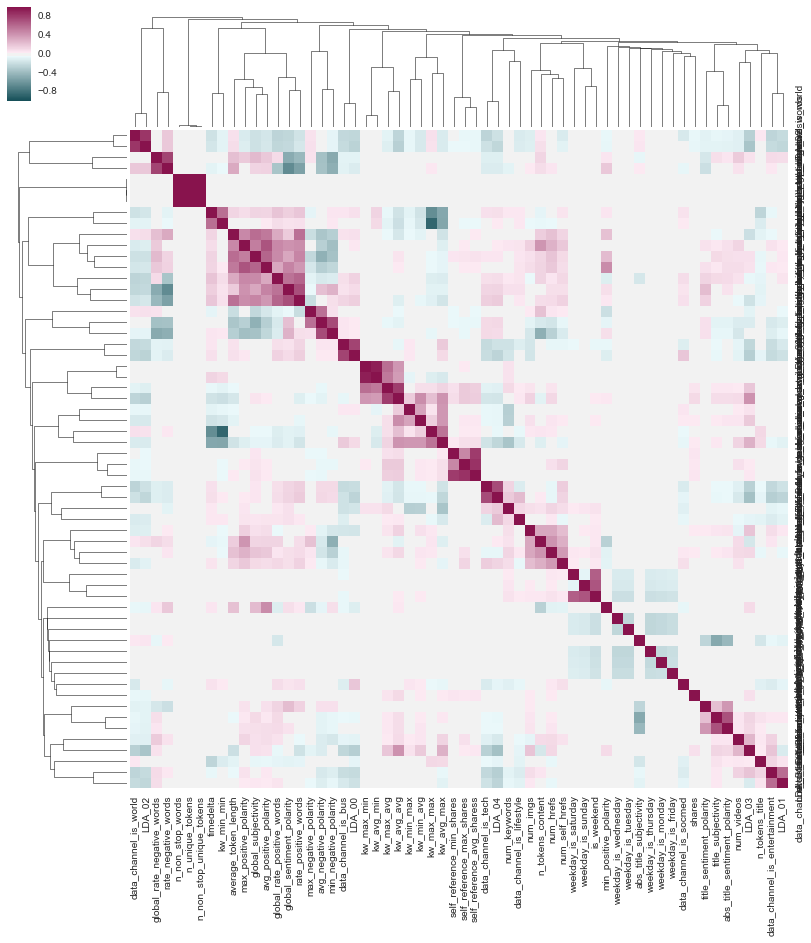

In [ ]:
import seaborn
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
seaborn.clustermap(data[numeric].corr(), figsize=(14, 14), cmap=cmap)

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


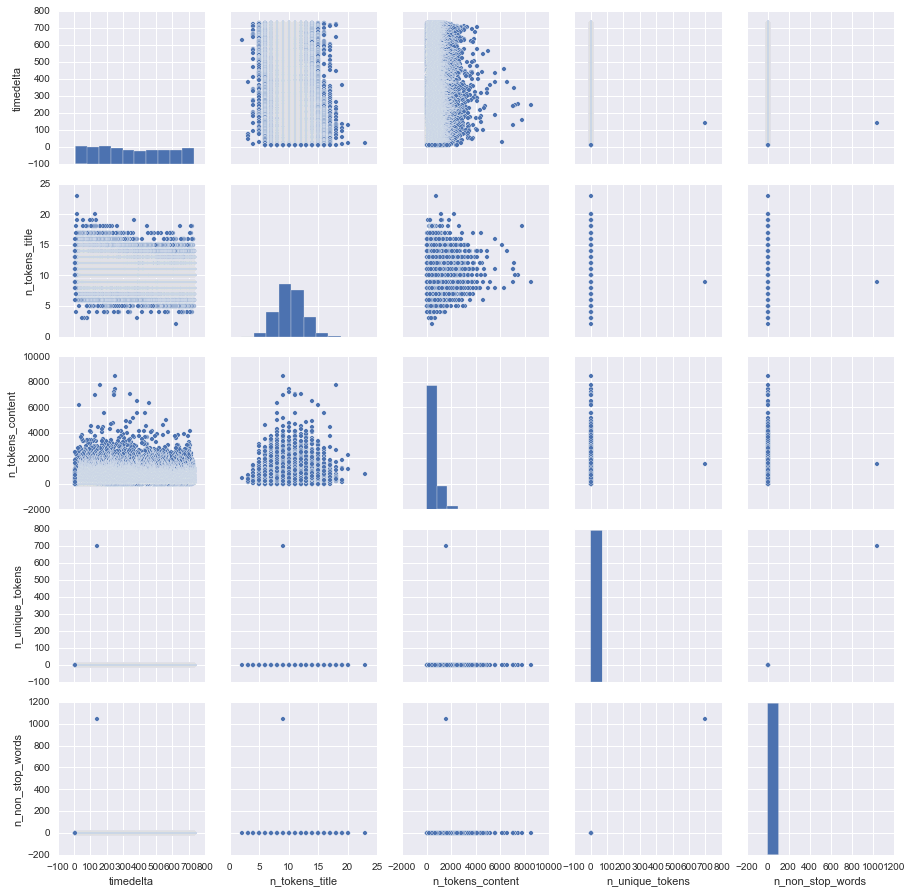

In [ ]:
import seaborn
seaborn.pairplot(data[numeric[:5]])

In [ ]:
data[data.n_unique_tokens > 100]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142,9,1570,701,1042,650,11,10,51,...,0,0,0,0,0,0,0,0,0,5900


We remove this row as it seems an outliar:

In [ ]:
data_clean = data[data.n_unique_tokens < 100].copy()

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


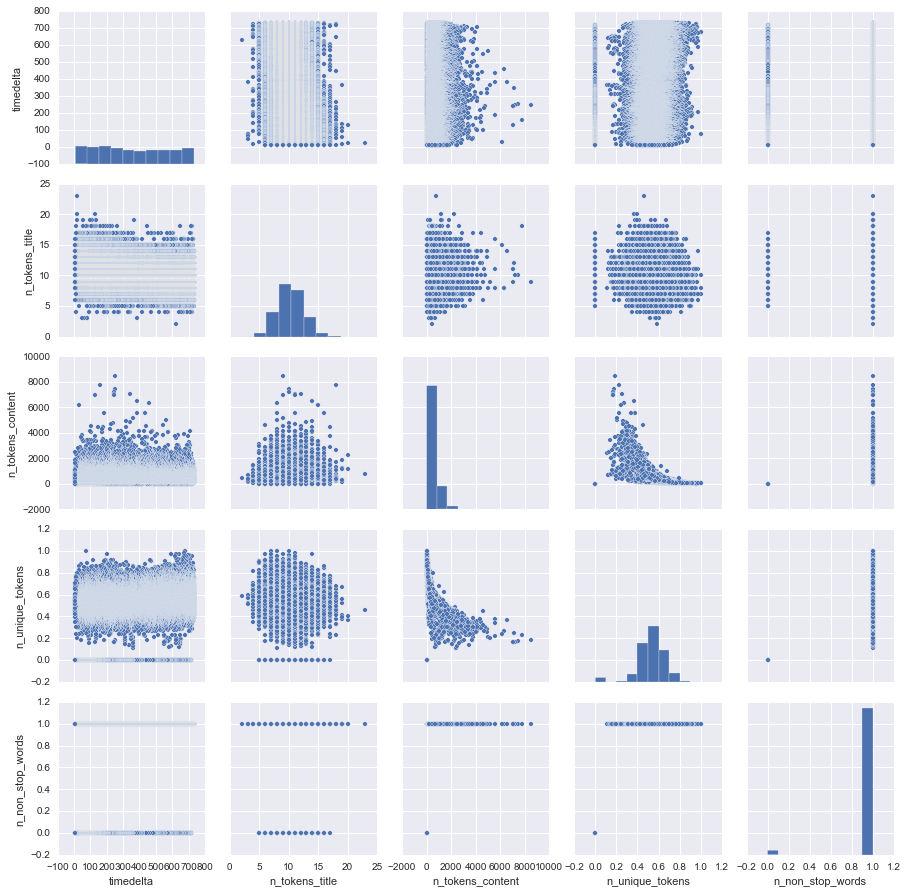

In [ ]:
seaborn.pairplot(data_clean[numeric[:5]])

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


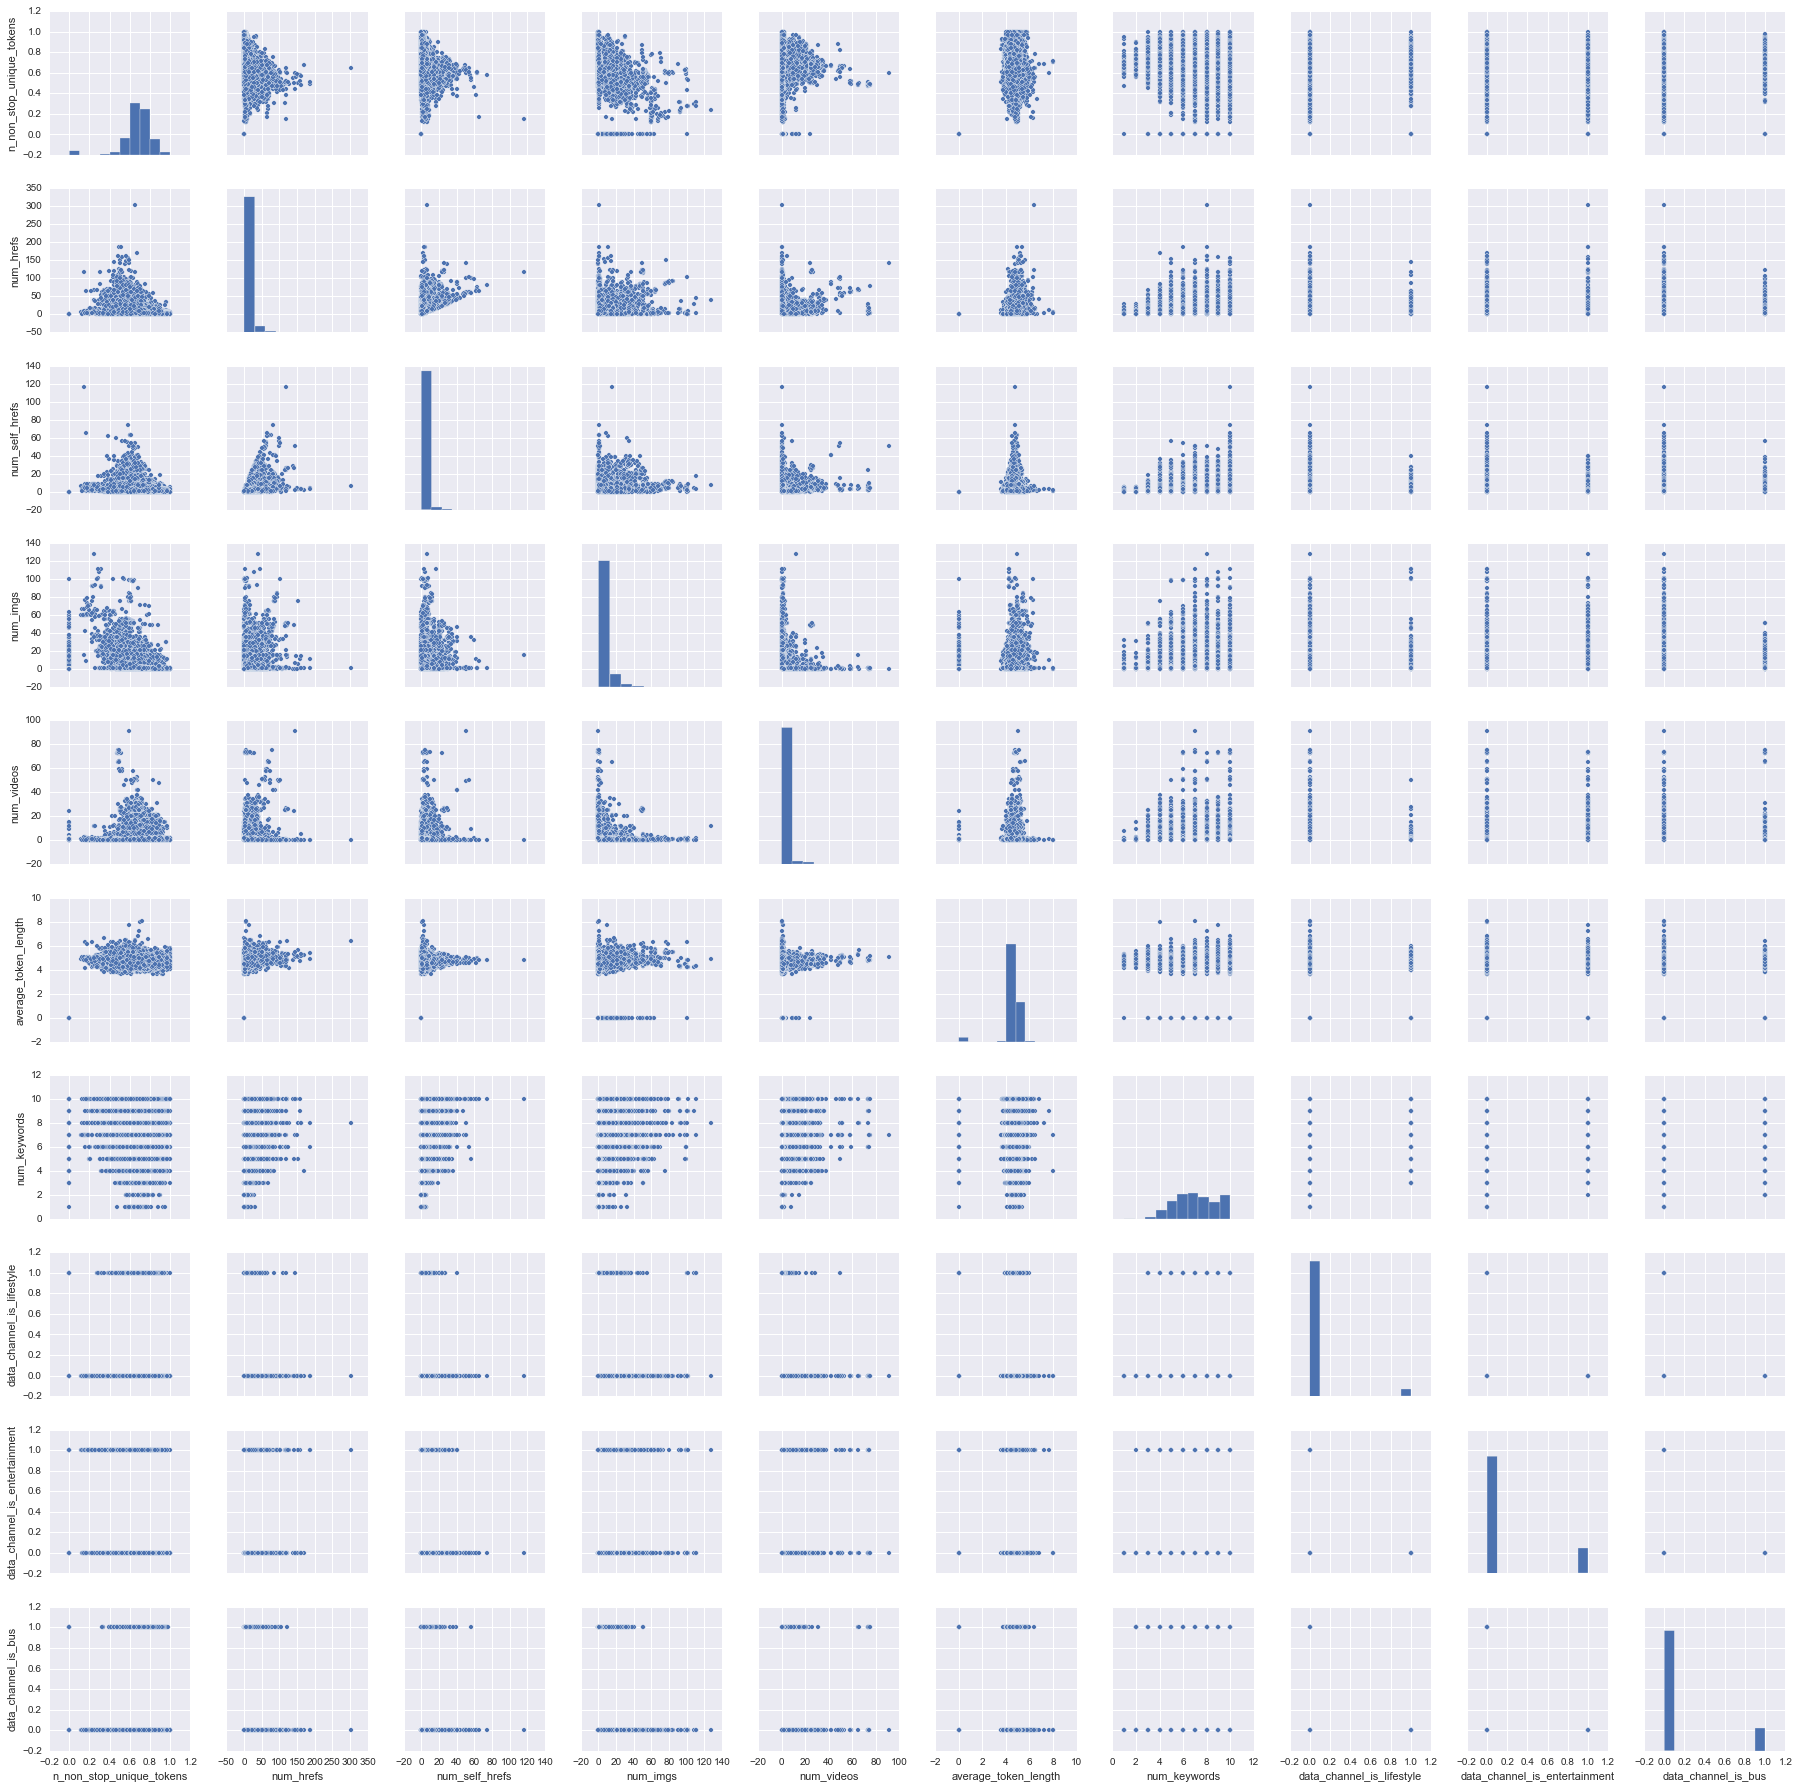

In [ ]:
seaborn.pairplot(data_clean[numeric[5:15]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001A9E9BE0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000218F5710>]], dtype=object)

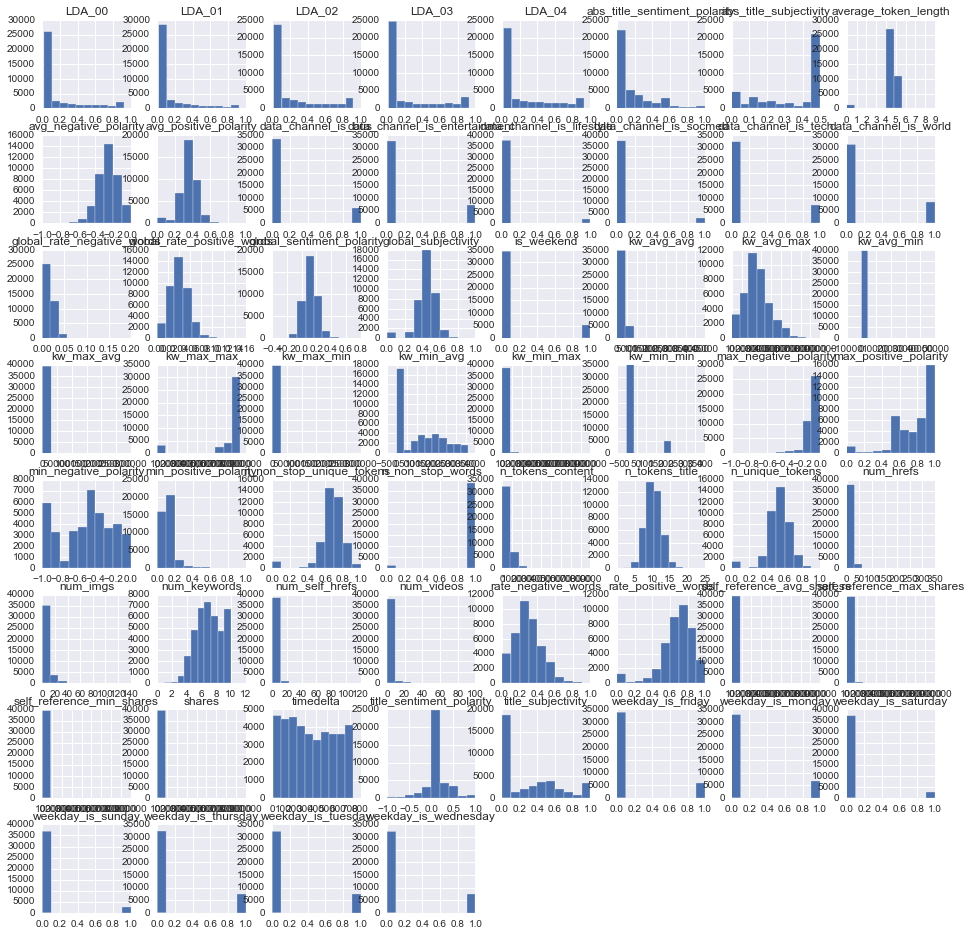

In [ ]:
data_clean.hist(figsize=(16,16))

In [ ]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["scale"] = ""
desc.ix[desc["log"],"scale"] = "log"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


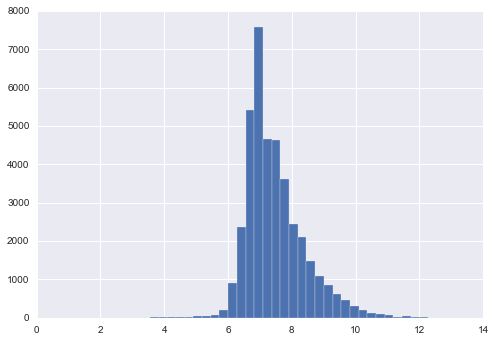

In [ ]:
import numpy
numpy.log(data_clean["shares"]).hist(bins=50)

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


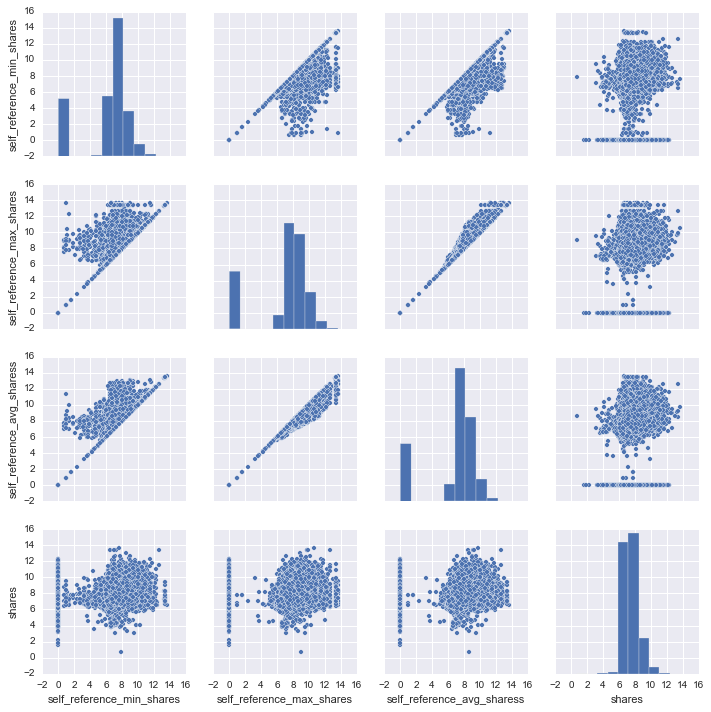

In [ ]:
shares = data_clean[[c for c in numeric if "share" in c]].copy()
for c in shares.columns:
    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(shares)

c:\python34_x64\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


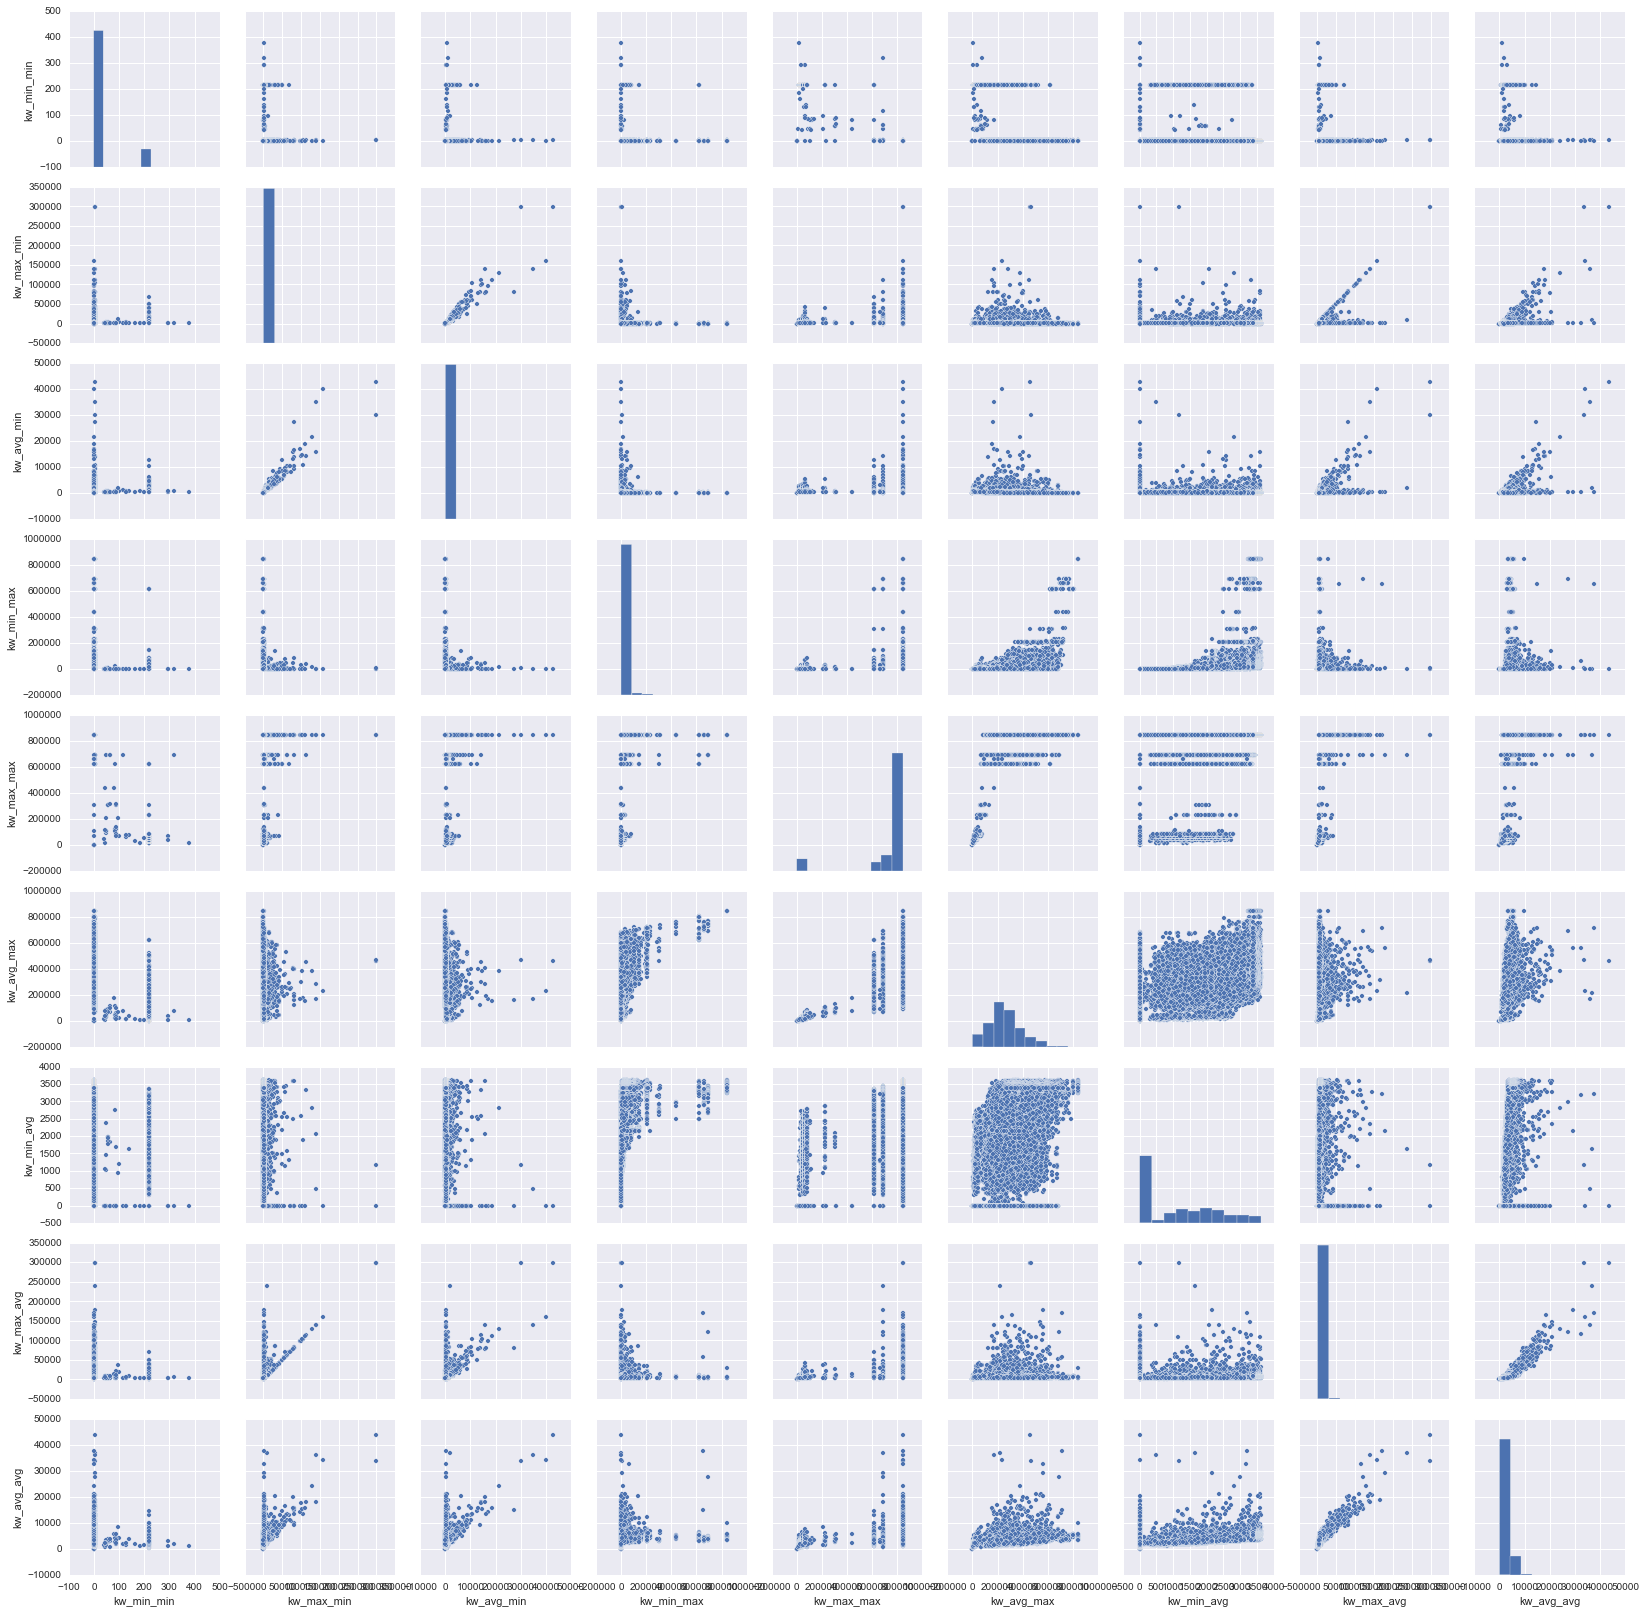

In [ ]:
kw = data_clean[[c for c in numeric if "kw" in c]].copy()
#for c in shares.columns:
#    shares[c] = numpy.log(shares[c] + 1)
seaborn.pairplot(kw)

## Outcome, cleaning scaling

cleaning

In [ ]:
data_clean = data[data.n_unique_tokens < 100].copy()

scaling: we consider that if the maximum is far away from the mediane, the scale should be logarithmic as it is far way from a gaussian law, it just applies on this problem

In [ ]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["log+2"] = desc["log"] & (desc["min"] < 0)
desc["scale"] = ""
desc.ix[desc["log"],"scale"] = "log"
desc.ix[desc["log+2"],"scale"] = "log+2"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


In [ ]:
import numpy
new_data = data_clean.copy()
for c in desc.index [ desc["scale"] == "log"]:
    new_data[c] = numpy.log(new_data[c] + 1)
for c in desc.index [ desc["scale"] == "log+2"]:
    new_data[c] = numpy.log(new_data[c] + 2)    

In [ ]:
new_data.shape

(39643, 61)

In [ ]:
set(new_data.dtypes)

{dtype('float64'), dtype('O')}

In [ ]:
from sklearn.cross_validation import train_test_split

features = new_data[[c for c in numeric if c != "shares"]]
target = new_data["shares"]
X_train, X_test, y_train, y_test = train_test_split(features, target)

## learning

[RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
clr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=20,
           min_samples_split=10, min_weight_fraction_leaf=0.01,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
tpredicted = clr.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,-0.002405
train_expected,-0.002405,1.000000


In [ ]:
df = pandas.DataFrame()
df["test_predicted"] = clr.predict(X_test)
df["test_expected"] = y_test
df.corr()

,test_predicted,test_expected
test_predicted,1.000000,0.005264
test_expected,0.005264,1.000000


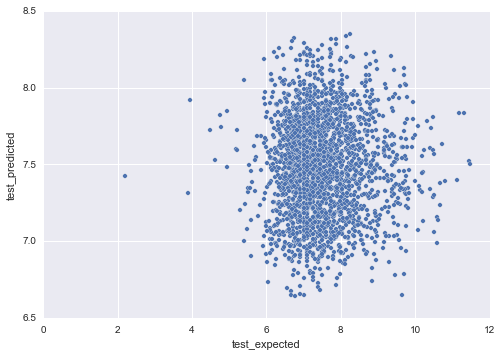

In [ ]:
df.plot(x ="test_expected", y="test_predicted", kind="scatter")

[GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
est.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=20, min_samples_split=10,
             min_weight_fraction_leaf=0.01, n_estimators=50,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [ ]:
tpredicted = est.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = tpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.00000,-0.00089
train_expected,-0.00089,1.00000


In [ ]:
df = pandas.DataFrame()
df["train_predicted"] = est.predict(X_train)
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.00000,-0.00089
train_expected,-0.00089,1.00000


[XGBRegressor](https://github.com/dmlc/xgboost/blob/master/demo/guide-python/sklearn_examples.py)

In [ ]:
import xgboost
clxg = xgboost.XGBRegressor(max_depth=10, learning_rate=0.3, n_estimators=50)
clxg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.3,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=50, nthread=-1, objective='reg:linear', seed=0,
       silent=True, subsample=1)

In [ ]:
xgpredicted = clxg.predict(X_train)
df = pandas.DataFrame()
df["train_predicted"] = xgpredicted
df["train_expected"] = y_train
df.corr()

,train_predicted,train_expected
train_predicted,1.000000,-0.003345
train_expected,-0.003345,1.000000


In [ ]:
# trop long
#from sklearn import tree
#from sklearn.ensemble import AdaBoostRegressor
#clfr = tree.DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=10)
#clf2 = AdaBoostRegressor(clfr, n_estimators=800, learning_rate=0.5)
#clf2.fit(X_train, y_train)

## t-SNE

[Comparison of Manifold Learning methods](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), [t-distributed Stochastic Neighbor Embedding (t-SNE)](http://scikit-learn.org/stable/modules/manifold.html#t-sne)

In [ ]:
from sklearn.cross_validation import train_test_split
X_1, X_2, y_1, y_2 = train_test_split(X_train.reset_index(drop=True), 
                        y_train.reset_index(drop=True), test_size=0.2, random_state=42)
X_1.shape, X_2.shape

((23785, 59), (5947, 59))

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
model

TSNE(angle=0.5, early_exaggeration=4.0, init='random', learning_rate=1000.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=30,
   perplexity=30.0, random_state=0, verbose=0)

In [ ]:
W_2 = model.fit_transform(X_2)

In [ ]:
i_2 = y_2.astype(int)

In [ ]:
W_2.shape, X_2.shape, y_2.shape, i_2.shape

((5947, 2), (5947, 59), (5947,), (5947,))

In [ ]:
mini, maxi = min(i_2), max(i_2)+1

0 (1, 1)
1 (0, 1)
2 (0, 1)
3 (3, 1)
4 (22, 1)
5 (48, 1)
6 (1761, 1)
7 (2714, 1)
8 (969, 1)
9 (326, 1)
10 (84, 1)
11 (14, 1)
12 (5, 1)


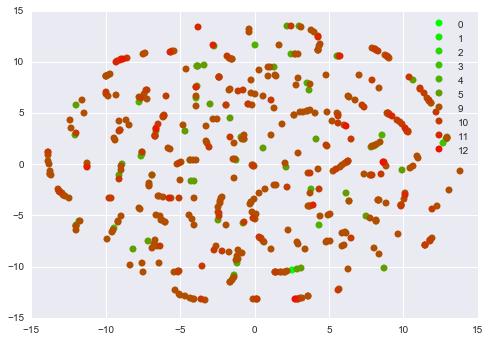

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

for i in range(mini, maxi):
    ind = numpy.array(numpy.where(i_2==i)).T
    print(i, ind.shape)
    if i in(6,7,8):
        continue
    m = "o" if i <= 9 else "o"
    r = 1.0*i / maxi
    ax.plot(W_2[ind,0], W_2[ind,1], m, color =(r, 1-r, 0.0), label=str(i))
ax.legend()
ax